<a href="https://colab.research.google.com/github/AyrusCodes/Main-Project/blob/main/code_surya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/roboflow/train/വിചാരം/Screenshot-2025-01-02-105051_png_jpg.rf.cbbe8cc93b618834fabb8d9d178aa695.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-130826_png_jpg.rf.f19f13ea4fea0e9a5080024dfe97b8c4.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-105115_png_jpg.rf.968da6c2c4fbecf36778f7b94dcb73d3.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-103517_png_jpg.rf.84e10a2cc88f28bb224e82b725d05017.jpg  
  inflating: /content/roboflow/train/വിചാരം/Screenshot-2025-01-02-115542_png_jpg.rf.82f50a28f675835245f0e4b167b3fbd6.jpg  
  inflating: /content/roboflow/train/വിചാരം/Screenshot-2025-01-02-115542_png_jpg.rf.b14fcb679db14e107f4d9fbd0e6c5abe.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-105115_png_jpg.rf.55592c4ca4cf42e2c670b6f156fd5548.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-105115_png_jpg.rf.ef64c4f2d

In [ ]:
# Replace with the path of the folder to delete
!rm -r /content/dataset


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, LSTM, Bidirectional, Input, Reshape, Dropout
from tensorflow.keras.models import Model
import os

# Create the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set your dataset path
dataset_path = "/content/roboflow"  # Update this to your dataset path

# Use the pre-existing directories for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(dataset_path, 'valid'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Typically no shuffle for test data
)

# Ensure consistent class mapping across generators
class_indices = train_generator.class_indices
validation_generator.class_indices = class_indices
test_generator.class_indices = class_indices

# Define the CNN + LSTM model for sequence recognition
input_layer = Input(shape=(32, 128, 1))

# CNN feature extraction
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Reshape for sequence processing
x = Reshape((16, -1))(x)

# Bidirectional LSTM layers for sequence processing
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(128, return_sequences=False))(x)
x = Dropout(0.2)(x)

# Dense layers for classification
x = Dense(256, activation='relu')(x)
output_layer = Dense(len(class_indices), activation='softmax')(x)

# Create and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    # callbacks=[tf.keras.callbacks.EarlyStopping(
    #     monitor='val_loss',
    #     patience=5,
    #     restore_best_weights=True
    # )]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Save the model
model.save("malayalam_word_recognition.h5")


Found 8811 images belonging to 254 classes.
Found 866 images belonging to 254 classes.
Found 389 images belonging to 250 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 128, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 128, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 32, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 32, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 16, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 16, 512)             │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 254)                 │          65,278 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,455,038 (9.37 MB)

 Trainable params: 2,455,038 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 32s 98ms/step - accuracy: 0.0064 - loss: 5.5211 - val_accuracy: 0.0139 - val_loss: 5.3955
Epoch 2/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.0179 - loss: 5.2826 - val_accuracy: 0.0219 - val_loss: 4.9671
Epoch 3/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.0331 - loss: 4.7933 - val_accuracy: 0.0543 - val_loss: 4.3008
Epoch 4/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.0797 - loss: 4.0837 - val_accuracy: 0.1270 - val_loss: 3.6120
Epoch 5/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.2026 - loss: 3.1640 - val_accuracy: 0.3083 - val_loss: 2.7523
Epoch 6/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 27s 96ms/step - accuracy: 0.3991 - loss: 2.1445 - val_accuracy: 0.4861 - val_loss: 1.8813
Epoch 7/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.6133 - loss: 1.3210 - val_accuracy: 0.6409 - val_loss: 1.2919
Epoch 8/50
276/276 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.7618 - loss: 0.7651 -

Test Loss: 18.895734786987305, Test Accuracy: 0.4755783975124359


Label mapping saved successfully!


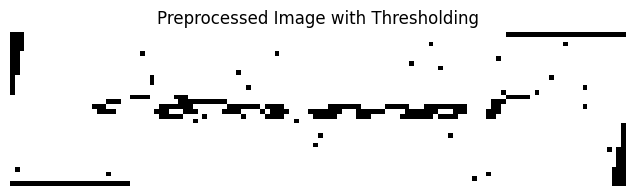

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: അഞ്ച്
Confidence: 100.00%

Top 3 Predictions:
--------------------------------------------------
അഞ്ച്: 100.00%
കടൽ: 0.00%
അർത്ഥം: 0.00%


'അഞ്ച്'

In [37]:
import tensorflow as tf
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Apply Otsu's thresholding (binary thresholding)
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Add channel and batch dimensions
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel dimension (grayscale)
    img_thresholded = np.expand_dims(img_thresholded, axis=0)   # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 2))
    plt.imshow(img_thresholded[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image with Thresholding")
    plt.axis('off')
    plt.show()

    return img_thresholded

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    # Print the prediction results
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Word: {predicted_word}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    print("-" * 50)
    for idx in top_3_indices:
        word = class_mapping[idx]
        conf = predictions[0][idx] * 100
        print(f"{word}: {conf:.2f}%")

    return predicted_word

# Function to test multiple images from a folder
def test_multiple_images(model_path, image_folder, label_mapping_path):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)

    # Load the class mapping
    class_mapping = load_class_mapping(label_mapping_path)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    print(f"\nTesting {len(image_files)} images...")
    print("-" * 50)

    # Predict each image
    for image_file in image_files:
        print(f"\nTesting image: {image_file}")
        image_path = os.path.join(image_folder, image_file)
        predict_word(image_path, model, class_mapping)
        print("-" * 50)

# Example usage for saving class mapping
train_folder = "/content/roboflow/train"  # Path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

# Example usage for predicting a single image
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
image_path = "/content/roboflow/test/അഞ്ച്/Screenshot-2025-01-02-103918_png_jpg.rf.f6f42aba6ad3a9841be95c2d43214deb.jpg"  # Path to your test image
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Predict a single image
predict_word(image_path, model, class_mapping)

# Example usage for testing multiple images
# image_folder = "/content/dataset/test/അടയാളം"
# test_multiple_images(model_path, image_folder, label_mapping_path)


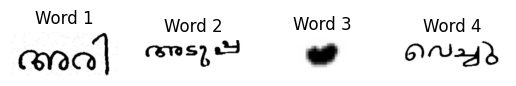

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_into_words(image_path):
    """
    Segments an image into individual words by identifying bounding boxes.

    Args:
        image_path (str): Path to the input image.

    Returns:
        list: List of segmented word images.
    """
    # Read the input image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply binary thresholding
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Dilate the image to connect components
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))  # Adjust kernel size as needed
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours from left to right
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    segmented_word_images = []

    for i, contour in enumerate(contours):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(contour)

        # Filter out small contours (noise)
        if w > 10 and h > 10:  # Adjust the minimum width and height as needed
            # Extract the word region
            word_image = image[y:y + h, x:x + w]
            segmented_word_images.append(word_image)

            # Save each word as an image (optional)
            cv2.imwrite(f"word_{i + 1}.png", word_image)

            # Plot the segmented word
            plt.subplot(1, len(contours), i + 1)
            plt.imshow(word_image, cmap='gray')
            plt.title(f"Word {i + 1}")
            plt.axis('off')

    plt.show()
    return segmented_word_images

# Example usage
segmented_words = segment_into_words("/content/Screenshot 2025-01-11 130302.png")  # Replace with your image path

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Decode the predictions
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            offset_x, offset_y = x * 4.0, y * 4.0
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw the bounding boxes on the original image
if len(indices) > 0:
    for i in indices.flatten():
        (start_x, start_y, end_x, end_y) = boxes[i]
        cv2.rectangle(orig, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

# Display the result
cv2_imshow(orig)


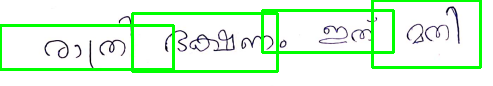

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Decode the predictions
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Draw the bounding boxes on the original image
if len(indices) > 0:
    for i in indices.flatten():
        (start_x, start_y, end_x, end_y) = scaled_boxes[i]
        cv2.rectangle(orig, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

# Display the result
cv2_imshow(orig)


In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,416 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

Saved: word_1.png


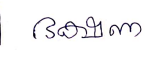

Saved: word_2.png


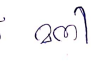

Saved: word_3.png


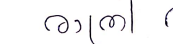

Saved: word_4.png


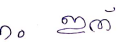

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Decode the predictions
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Crop and save each word segment
if len(indices) > 0:
    for i, index in enumerate(indices.flatten()):
        (start_x, start_y, end_x, end_y) = scaled_boxes[index]

        # Crop the detected region
        cropped_image = orig[start_y:end_y, start_x:end_x]

        # Save the cropped image
        file_name = f"word_{i + 1}.png"
        cv2.imwrite(file_name, cropped_image)
        print(f"Saved: {file_name}")

        # Optionally, display the cropped image
        cv2_imshow(cropped_image)


Saved: word_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step

Predicted Word: മതി with confidence: 88.82%


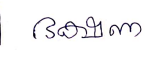

Saved: word_2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Predicted Word: ചിരി with confidence: 74.20%


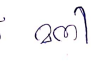

Saved: word_3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Predicted Word: വിധി with confidence: 56.84%


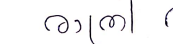

Saved: word_4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Predicted Word: പൂവ് with confidence: 32.68%


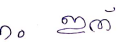

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import json
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Apply Otsu's thresholding (binary thresholding)
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Add channel and batch dimensions
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel dimension (grayscale)
    img_thresholded = np.expand_dims(img_thresholded, axis=0)   # Add batch dimension

    return img_thresholded

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    print(f"\nPredicted Word: {predicted_word} with confidence: {confidence:.2f}%")
    return predicted_word

# Function to decode predictions and get boxes from the EAST model
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Load the model and class mapping
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Crop, save, and predict each word segment
if len(indices) > 0:
    for i, index in enumerate(indices.flatten()):
        (start_x, start_y, end_x, end_y) = scaled_boxes[index]

        # Crop the detected region
        cropped_image = orig[start_y:end_y, start_x:end_x]

        # Save the cropped image
        file_name = f"word_{i + 1}.png"
        cv2.imwrite(file_name, cropped_image)
        print(f"Saved: {file_name}")

        # Predict the word
        predicted_word = predict_word(file_name, model, class_mapping)

        # Optionally, display the cropped image
        cv2_imshow(cropped_image)


Label mapping saved successfully!


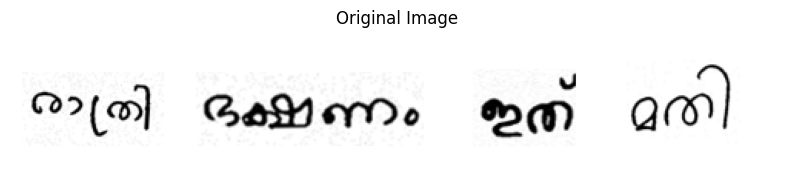

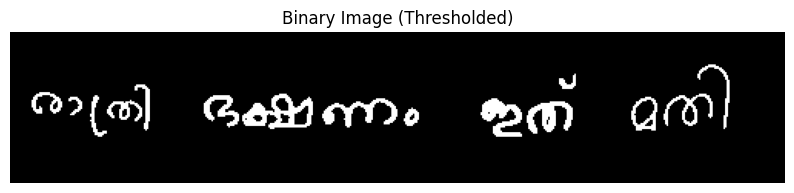

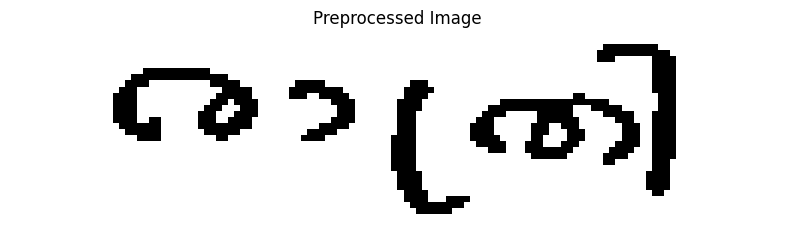

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Predicted Word: അടി with confidence: 94.18%
Predicted Word 1: അടി


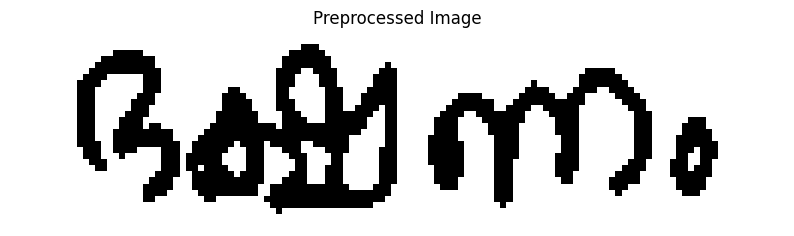

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Word: വില with confidence: 34.76%
Predicted Word 2: വില


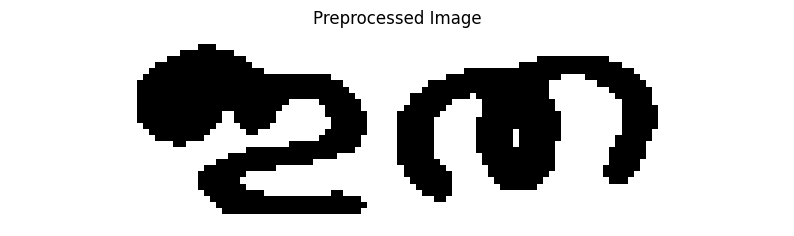

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Word: ജില്ല with confidence: 92.59%
Predicted Word 3: ജില്ല


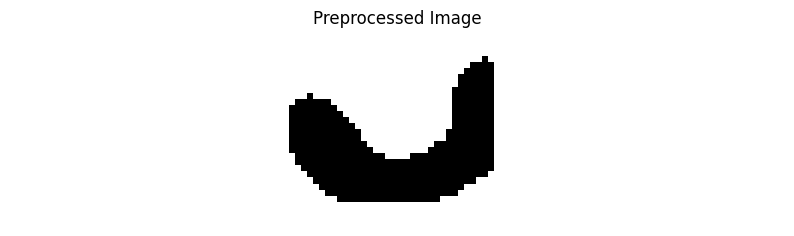

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Word: പട്ടി with confidence: 55.02%
Predicted Word 4: പട്ടി


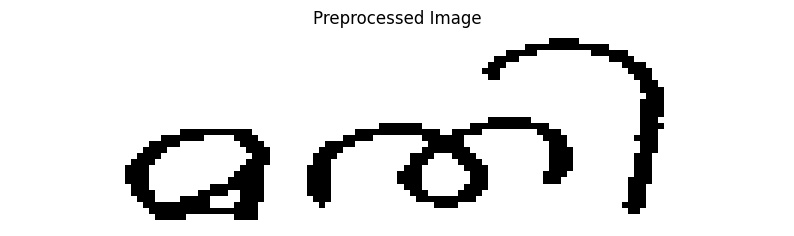

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Word: കരി with confidence: 93.38%
Predicted Word 5: കരി


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import os

# Segmenting image into words (first part of your code)
def segment_into_words(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    segmented_word_images = []

    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 10:  # Filter out noise
            word_image = image[y:y + h, x:x + w]
            segmented_word_images.append(word_image)
            # Optional: save the word images
            cv2.imwrite(f"word_{i + 1}.png", word_image)

    # Display the segmented image
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Display the binary image (after thresholding)
    plt.figure(figsize=(10, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image (Thresholded)")
    plt.axis('off')
    plt.show()

    return segmented_word_images

# Preprocessing and prediction (second part of your code)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")
    img_resized = cv2.resize(img, (128, 32))
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img_thresholded = img_thresholded / 255.0
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel
    img_thresholded = np.expand_dims(img_thresholded, axis=0)  # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 6))
    plt.imshow(img_thresholded[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

    return img_thresholded

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Example usage to save the label mapping
train_folder = "/content/roboflow/train"  # Replace with the path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

def predict_word(image_path, model, class_mapping):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100
    print(f"Predicted Word: {predicted_word} with confidence: {confidence:.2f}%")
    return predicted_word

# Path setup
image_path = "/content/Screenshot 2025-01-11 140131.png"  # Input image path
model_path = "malayalam_word_recognition.h5"  # Path to your trained model
label_mapping_path = "label_mapping.json"  # Path to your label mapping file

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Segment the image into words
segmented_words = segment_into_words(image_path)

# Predict each segmented word
for i, word_image in enumerate(segmented_words):
    word_image_path = f"word_{i + 1}.png"
    cv2.imwrite(word_image_path, word_image)
    predicted_word = predict_word(word_image_path, model, class_mapping)
    print(f"Predicted Word {i + 1}: {predicted_word}")


Label mapping saved successfully!


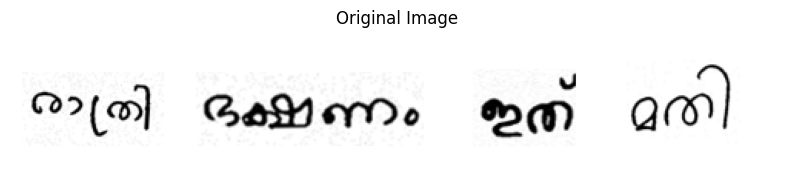

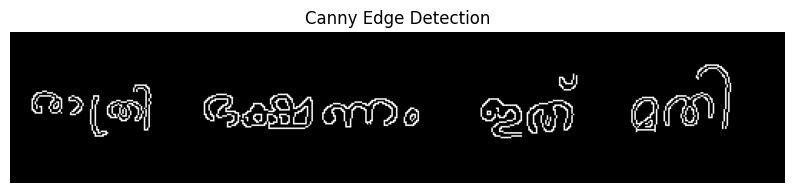

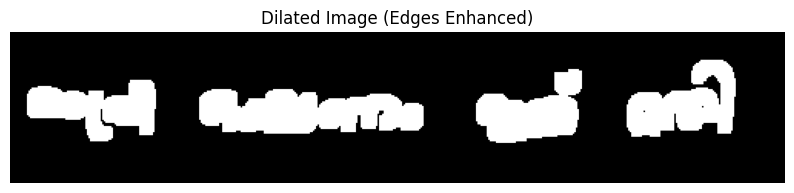

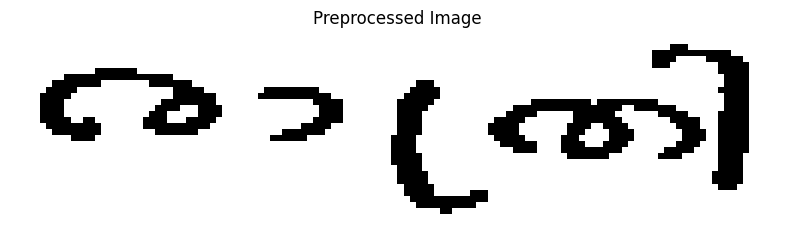

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Predicted Word: അടി with confidence: 99.60%
Predicted Word 1: അടി


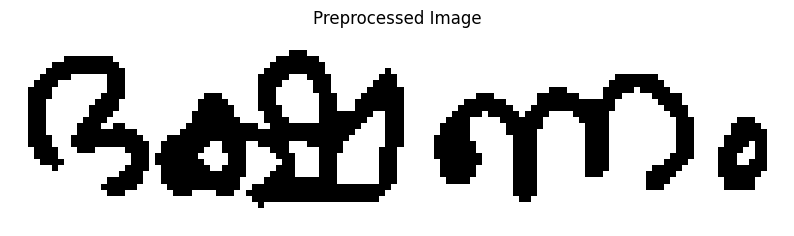

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Word: അടി with confidence: 40.05%
Predicted Word 2: അടി


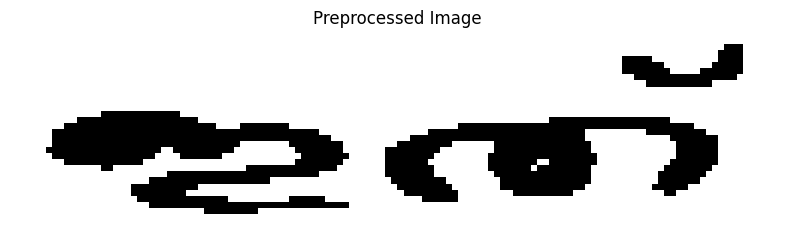

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Word: അടയാളം with confidence: 75.47%
Predicted Word 3: അടയാളം


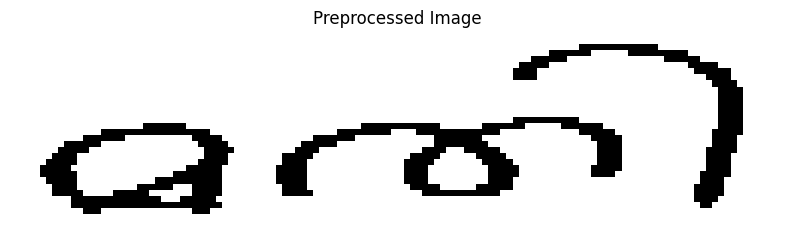

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Word: വില with confidence: 86.47%
Predicted Word 4: വില


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import os

# Segmenting image into words (using Canny edge detection)
def segment_into_words(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return []

    # Display original image for debugging
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Canny Edge Detection
    edges = cv2.Canny(image, 50, 150)  # Adjusted thresholds for better edge detection

    # Display Canny edges
    plt.figure(figsize=(10, 6))
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')
    plt.show()

    # Dilation with a smaller kernel to enhance the edges
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))  # Larger kernel for better dilation
    dilated_image = cv2.dilate(edges, kernel, iterations=1)

    # Display dilated edges
    plt.figure(figsize=(10, 6))
    plt.imshow(dilated_image, cmap='gray')
    plt.title("Dilated Image (Edges Enhanced)")
    plt.axis('off')
    plt.show()

    # Find contours after dilation
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to remove noise (small areas)
    contours = [ctr for ctr in contours if cv2.contourArea(ctr) > 500]  # Area threshold to remove small contours

    # Sort contours from left to right
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    segmented_word_images = []

    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        word_image = image[y:y + h, x:x + w]
        segmented_word_images.append(word_image)
        # Optional: save the word images
        cv2.imwrite(f"word_{i + 1}.png", word_image)

    return segmented_word_images

# Preprocessing and prediction (same as before)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")
    img_resized = cv2.resize(img, (128, 32))
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img_thresholded = img_thresholded / 255.0
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel
    img_thresholded = np.expand_dims(img_thresholded, axis=0)  # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 6))
    plt.imshow(img_thresholded[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

    return img_thresholded

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Example usage to save the label mapping
train_folder = "/content/roboflow/train"  # Replace with the path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

def predict_word(image_path, model, class_mapping):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100
    print(f"Predicted Word: {predicted_word} with confidence: {confidence:.2f}%")
    return predicted_word

# Path setup
image_path = "/content/Screenshot 2025-01-11 140131.png"  # Input image path
model_path = "malayalam_word_recognition.h5"  # Path to your trained model
label_mapping_path = "label_mapping.json"  # Path to your label mapping file

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Segment the image into words
segmented_words = segment_into_words(image_path)

# Predict each segmented word
for i, word_image in enumerate(segmented_words):
    word_image_path = f"word_{i + 1}.png"
    cv2.imwrite(word_image_path, word_image)
    predicted_word = predict_word(word_image_path, model, class_mapping)
    print(f"Predicted Word {i + 1}: {predicted_word}")


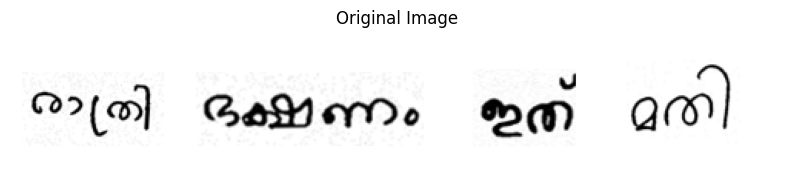

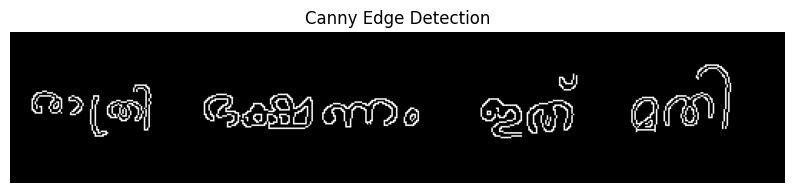

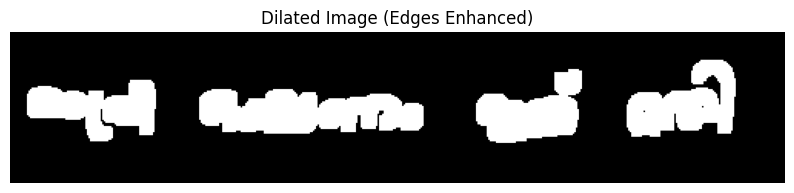

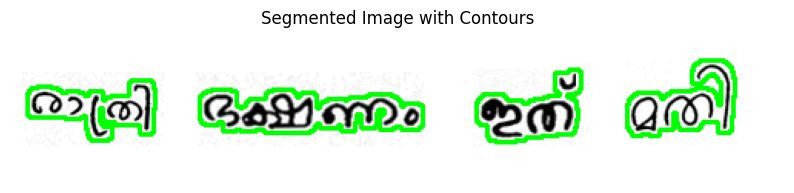

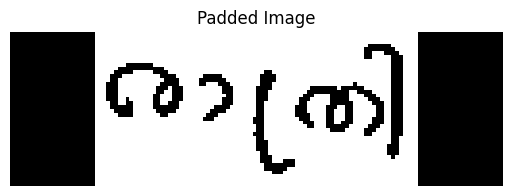

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: ആയി
Confidence: 26.92%

Top 3 Predictions:
--------------------------------------------------
ആയി: 26.92%
അടി: 21.72%
കരി: 11.91%
Predicted Word 1: ആയി


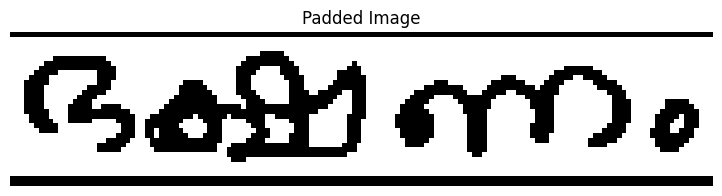

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: വില
Confidence: 75.35%

Top 3 Predictions:
--------------------------------------------------
വില: 75.35%
അടി: 18.57%
ഇത്: 1.96%
Predicted Word 2: വില


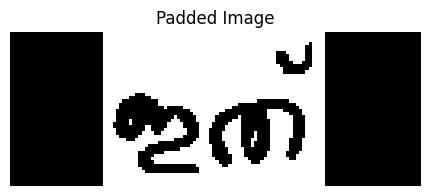

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: കളി
Confidence: 77.02%

Top 3 Predictions:
--------------------------------------------------
കളി: 77.02%
മല്ലി: 9.36%
കവി: 6.89%
Predicted Word 3: കളി


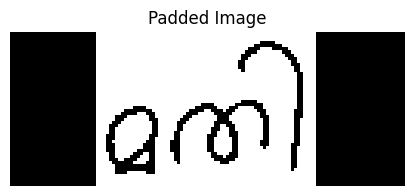

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: എന്ന
Confidence: 21.55%

Top 3 Predictions:
--------------------------------------------------
എന്ന: 21.55%
നീല: 18.33%
ആയി: 14.60%
Predicted Word 4: എന്ന


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import os

# Segmenting image into words (using Canny edge detection)
def segment_into_words(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return []

    # Display original image for debugging
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Canny Edge Detection
    edges = cv2.Canny(image, 50, 150)  # Adjusted thresholds for better edge detection

    # Display Canny edges
    plt.figure(figsize=(10, 6))
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')
    plt.show()

    # Dilation with a smaller kernel to enhance the edges
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))  # Larger kernel for better dilation
    dilated_image = cv2.dilate(edges, kernel, iterations=1)

    # Display dilated edges
    plt.figure(figsize=(10, 6))
    plt.imshow(dilated_image, cmap='gray')
    plt.title("Dilated Image (Edges Enhanced)")
    plt.axis('off')
    plt.show()

    # Find contours after dilation
    contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to remove noise (small areas)
    contours = [ctr for ctr in contours if cv2.contourArea(ctr) > 500]  # Area threshold to remove small contours

    # Sort contours from left to right
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    segmented_word_images = []

    # Draw contours on the original image for visual display
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for coloring the contours
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  # Green contours

    # Display the segmented image with contours
    plt.figure(figsize=(10, 6))
    plt.imshow(image_with_contours)
    plt.title("Segmented Image with Contours")
    plt.axis('off')
    plt.show()

    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        word_image = image[y:y + h, x:x + w]
        segmented_word_images.append(word_image)
        # Optional: save the word images
        cv2.imwrite(f"word_{i + 1}.png", word_image)

    return segmented_word_images

import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Apply Otsu's thresholding (binary thresholding)
    _, img_thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Dimensions needed for model
    target_height = 32
    target_width = 128

    height, width = img_thresholded.shape  # Get height and width directly

    # Padding to ensure the image has dimensions (32, 128)
    # Padding height if needed to make it 32
    if height < target_height:
        top_padding = (target_height - height) // 2
        bottom_padding = target_height - height - top_padding
    else:
        top_padding = bottom_padding = 0

    # Padding width if needed to make it 128
    if width < target_width:
        left_padding = (target_width - width) // 2
        right_padding = target_width - width - left_padding
    else:
        left_padding = right_padding = 0

    # Apply padding (only 2 dimensions for grayscale image)
    img_padded = np.pad(img_thresholded,
                        ((top_padding, bottom_padding),
                         (left_padding, right_padding)),
                        mode='constant', constant_values=0)  # Fill with zeros (black padding)

    # Display the padded image
    plt.figure(figsize=(10, 2))
    plt.imshow(img_padded, cmap='gray')  # Display img_padded directly
    plt.title("Padded Image")
    plt.axis('off')
    plt.show()

    # Ensure the image has the shape (32, 128)
    img_padded_resized = cv2.resize(img_padded, (target_width, target_height))

    # Add the batch and channel dimensions
    img_resized = np.expand_dims(img_padded_resized, axis=0)  # Add batch dimension
    img_resized = np.expand_dims(img_resized, axis=-1)  # Add channel dimension (grayscale)

    return img_resized



# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single word from the preprocessed image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    # Print the prediction results
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Word: {predicted_word}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    print("-" * 50)
    for idx in top_3_indices:
        word = class_mapping[idx]
        conf = predictions[0][idx] * 100
        print(f"{word}: {conf:.2f}%")

    return predicted_word

# Main execution
def main(image_path, model_path, label_mapping_path):
    # Load the model and class mapping
    model = tf.keras.models.load_model(model_path)
    class_mapping = load_class_mapping(label_mapping_path)

    # Segment the image into words and display the segmented image with contours
    segmented_words = segment_into_words(image_path)

    # Predict each segmented word
    for i, word_image in enumerate(segmented_words):
        word_image_path = f"word_{i + 1}.png"
        cv2.imwrite(word_image_path, word_image)
        predicted_word = predict_word(word_image_path, model, class_mapping)
        print(f"Predicted Word {i + 1}: {predicted_word}")

# Example usage
image_path = "/content/Screenshot 2025-01-11 140131.png"  # Input image path
model_path = "malayalam_word_recognition.h5"  # Path to your trained model
label_mapping_path = "label_mapping.json"  # Path to your label mapping file

main(image_path, model_path, label_mapping_path)
